# A super-brief intro to Python and Numpy

Python is:
* interpreted (high level)
* readable
* concise
* cross-platform
* dynamically-typed
* object oriented
* automatically memory-managed

Almost all of the below is explained much more fully at various places online. Try:
http://nbviewer.ipython.org/github/jrjohansson/scientific-python-lectures/tree/master/
...for a nice entry level tutorial set, or the Software Carpentry intros:
http://software-carpentry.org/v4/python/

The main Python documentation is also an extremely readable source of knowledge. Just Google!

##PROGRAM FILES AND INTERACTIVE ENVIRONMENTS
Put Python code in .py text files (AKA "scripts").
Run these from a shell, as:

> python myscript.py

OR

Use one of Python's interactive environments (e.g., iPython)!

> ipython

In an interactive environment:

* Run code line-by-line, preserving variables
* Run your scripts, using the magic command "%run" (& preserve the variables)

This iPython notebook is an interactive environment.

##MODULES
Python has some built-in functions, but everything else comes in a library module.

* See the built in functions here: https://docs.python.org/2/library/functions.html

Modules are *imported*, then the functions they hold run with a *dot* syntax:

In [37]:
import math  # comments with a hash
x = math.cos(2. * math.pi)
print x   # print is a built-in function

1.0


OR import the functions and properties individually:

In [38]:
from numpy import cos, pi #numpy, numeric python, also has these functions
x = cos(2. * pi)
print x

1.0


Get help in an interactive shell with a trailing "?", quit it with "q"

In [39]:
pi?

##TYPES
Python distinguishes:
* integer (int)
* float (float)
* boolean (bool)
* complex (complex)
* strings (str)

You may also encounter numpy types, like "numpy.float64"

In [40]:
type(pi)

float

Typecasting is automatic where possible, but can be time-expensive.

Python's inbuilt *data structures* are:
* tuples, with *parentheses* - immutable
* lists, with *square brackets* - mutable
* sets, as set() - unordered collection with no duplicates
* dictionaries, with *curly brackets* - associated pairs of key:value

Note that all these data structures let you happily mix data types... But the cost is that Python runs slower than, e.g., C++.

In [41]:
mytuple = (0,1,2,3)
print 'You can index: ', mytuple[1]
print '...but not reassign...'
mytuple[0] = 100

You can index:  1
...but not reassign...


TypeError: 'tuple' object does not support item assignment

In [42]:
mylist = [0,1,2,3]
print 'This time reassignment works: '
mylist[0] = 'I can store a string!'
print mylist

This time reassignment works: 
['I can store a string!', 1, 2, 3]


In [43]:
myset = set([0,1,2,3])
print myset
myset.add("string!") #you can use both ' and " to declare a string
print 'Adding is easy: ', myset
myset.add(0)
print "But remember, duplicates don't count! ", myset

set([0, 1, 2, 3])
Adding is easy:  set([0, 1, 2, 3, 'string!'])
But remember, duplicates don't count!  set([0, 1, 2, 3, 'string!'])


In [44]:
mydict = {'firstkey':1, 'secondkey':2, 3:'three'}
print mydict
print mydict['firstkey']
print mydict['secondkey']
print mydict[3]
print 'Get the keys (note lack of ordering): ', mydict.keys()
print 'Get the values: ', mydict.values()
print 'This will fail: ', mydict[2]

{'secondkey': 2, 3: 'three', 'firstkey': 1}
1
2
three
Get the keys (note lack of ordering):  ['secondkey', 3, 'firstkey']
Get the values:  [2, 'three', 1]
This will fail: 

KeyError: 2

## INDEXING
* Indexing starts from 0
* Index with square brackets [start (: stop(: step))]
* "stop" is *exclusive* of the named index
* Colon alone means "all of these" or "to the start/end"

In [45]:
x = range(10)
print 'x[3] gives ', x[3]
print 'x[1,5,2] gives ', x[1:5:2]
print 'x[8:] gives ', x[8:]
print 'x[:7] gives ', x[:7]
print 'x[::3] gives ', x[::3]

 x[3] gives  3
x[1,5,2] gives  [1, 3]
x[8:] gives  [8, 9]
x[:7] gives  [0, 1, 2, 3, 4, 5, 6]
x[::3] gives  [0, 3, 6, 9]


## PYTHON IS LIKE, BUT ISN'T, MATLAB
- This is a *power*:

In [46]:
x = 10.**2  #...or...
import numpy as np
x = np.square(10.)  # NEVER 10.^2.

Likewise, it's also useful to know about the "truncation" (//) and "remainder" (%) division operators:

In [47]:
print 'truncate: ', 13//4
print 'remainder: ', 13%4

truncate:  3
remainder:  1


- End indices are NOT inclusive

In [48]:
len(range(0,100)) #in Matlab this would be 101

100

In [49]:
[x for x in xrange(5)]

[0, 1, 2, 3, 4]

- Intelligent memory management means Python will pass objects *by reference* where possible:

In [50]:
x = [0] * 3
y = [1,2,3]
print 'x starts as ', x
print 'y starts as ', y
x = y
print 'After setting equal, x is ', x
y[1] = 100
print 'After modifying y, x is ', x
#force a copy with [:]
x = y[:]
y[1] = 1000000
print 'After forcing a copy, x is still ', x, ' but y is now ', y

x starts as  [0, 0, 0]
y starts as  [1, 2, 3]
After setting equal, x is  [1, 2, 3]
After modifying y, x is  [1, 100, 3]
After forcing a copy, x is still  [1, 100, 3]  but y is now  [1, 1000000, 3]


- As long as you assign to a variable, Python doesn't output by default, so lines don't have to terminate in ";"

In [51]:
x = range(10) #...see?

- Python doesn't use brackets to delineate code blocks. It uses *indentation* with a fixed number of spaces (normally 4). This also applies to for loops, while loops, if statements, try/except statements, class declarations, function declarations, etc etc.

In [52]:
def myfunction(arg1, arg2, **kwds):
    # **kwds is a special (optional) dictionary input type,
    # that you can use as an input "wildcard"
    try:
        print_this = kwds['printy']
    except KeyError:
        x = arg1 * arg2
        return x  #...no brackets needed; both lines have 4 space indents
    else:
        print print_this

print 'first time ', myfunction(3.,4.)
print 'second time... '
myfunction(5,6,printy='Printed this time!')

first time  12.0
second time... 
Printed this time!


- Python's plotting is a blatant clone of matlab's, and lives in the library matplotlib.pyplot:

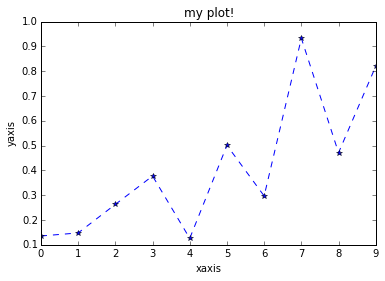

In [53]:
%matplotlib inline
#that command tells this notebook to put plots into the notebook
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(10.) #like range()
y = np.random.rand(10.) #ten random floats, 0->1
plt.plot(x,y, '*--')
plt.xlabel('xaxis')
plt.ylabel('yaxis')
plt.title('my plot!')

## NUMPY and LANDLAB

Landlab makes extensive use of the numpy (Numeric Python) libraries. These allow significant acceleration of standard Python processes on matrix-like data arrays. Here we look at some of the key features and differences with pure Python, and some numpy best-practice.

In [54]:
import numpy as np

Initialize numpy arrays from standard Python iterables (lists, tuples):

In [55]:
myarray = np.array([0,1,3,6,18])

...or with one of the standard array creation methods in numpy. Particularly useful ones are:

In [56]:
a = np.zeros(10, dtype=int)
b = np.ones(5, dtype=bool)
c = np.random.rand(10)
d = np.arange(5.)
e = np.empty((3,3), dtype=float)
e.fill(100.)
print 'a: ', a
print 'b: ', b
print 'c: ', c
print 'd: ', d
print 'e: ', e

a:  [0 0 0 0 0 0 0 0 0 0]
b:  [ True  True  True  True  True]
c:  [ 0.63581801  0.80319728  0.8559473   0.98304986  0.33224087  0.75570966
  0.12057116  0.63345515  0.01121943  0.97527723]
d:  [ 0.  1.  2.  3.  4.]
e:  [[ 100.  100.  100.]
 [ 100.  100.  100.]
 [ 100.  100.  100.]]


Arrays also have some built in methods and properties. We see 'fill' above, but also noteworthy are:

In [57]:
print 'shape: ', e.shape
print 'size: ', e.size #preferred to len()
c.max(), c.min(), c.mean(), c.sum()
f = c.copy()
print 'flatten: ', e.flatten()

shape:  (3, 3)
size:  9
flatten:  [ 100.  100.  100.  100.  100.  100.  100.  100.  100.]


Slicing works like (better than?) in pure Python:

In [58]:
print d[2:]

[ 2.  3.  4.]


In [59]:
 e[1,1] = 5.
print e
print e[1:,1:]

[[ 100.  100.  100.]
 [ 100.    5.  100.]
 [ 100.  100.  100.]]
[[   5.  100.]
 [ 100.  100.]]


Note that logical operations with numpy tend to require numpy-native functions, rather than pure Python and, or, not etc.

In [60]:
bool1 = np.array([True, True, False, False])
bool2 = np.array([True, False, True, False])
print 'AND: ', np.logical_and(bool1, bool2)
print 'OR: ', np.logical_or(bool1, bool2)
print 'NOT: ', np.logical_not(bool1)
print 'ANY: ', np.any(bool1)
print 'ALL: ', np.all(bool1)

AND:  [ True False False False]
OR:  [ True  True  True False]
NOT:  [False False  True  True]
ANY:  True
ALL:  False


Now, let's demonstrate the speed of numpy over pure Python:

In [61]:
f_list = range(1000)
f_array = np.arange(1000, dtype=int)

def addone_py(list_in):
    for i in list_in:
        i += 1

def addone_np(array_in):
    array_in += 1
    
print 'time for list:'
%timeit addone_py(f_list)

print 'time for array:'
%timeit addone_np(f_array)

time for list:
10000 loops, best of 3: 30.9 µs per loop
time for array:
The slowest run took 12.49 times longer than the fastest. This could mean that an intermediate result is being cached 
1000000 loops, best of 3: 1.2 µs per loop


In particular, never loop to do a logical test:

In [62]:
#NOT THIS:
myoutput_slow = np.zeros(10., dtype=float)
for i in xrange(len(c)): #c is our random number array
    if c[i] > 0.5:
        myoutput_slow[i] = c[i]

#DO THIS INSTEAD:
myoutput_fast = np.zeros(10., dtype=float)
greater_than_half = c>0.5
myoutput_fast[greater_than_half] = c[greater_than_half]

print np.all(np.equal(myoutput_slow, myoutput_fast))

True


The online numpy help is actually an extremely readable resource, and is highly recommended to find out more about the family of available numpy methods.